In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar, minimize
from time import time
import seaborn as sns
sns.set_style('darkgrid')
import sys
sys.path.append('..')

In [2]:
from osd import Problem
from osd.components import GaussNoise, SmoothSecondDifference, SmoothFirstDifference
import cvxpy as cvx
SOLVER = 'OSQP'    # https://osqp.org/

# Simple Signal

In [3]:
np.random.seed(42)
t = np.linspace(0, 1000, 3000)
signal1 = np.sin(2 * np.pi * t * 1 / (500.))
y = signal1 + 0.25 * np.random.randn(len(signal1))

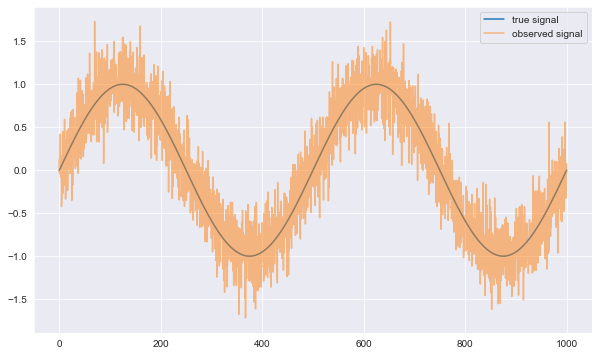

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal1, label='true signal')
plt.plot(t, y, alpha=0.5, label='observed signal')
plt.legend()
plt.show()

## First-Order Difference Smoothing

In [5]:
problem = Problem(data=y, components=[GaussNoise, SmoothFirstDifference])
problem.optimize_weights(solver=SOLVER)
problem.weights.value

array([  1.        , 748.46927535])

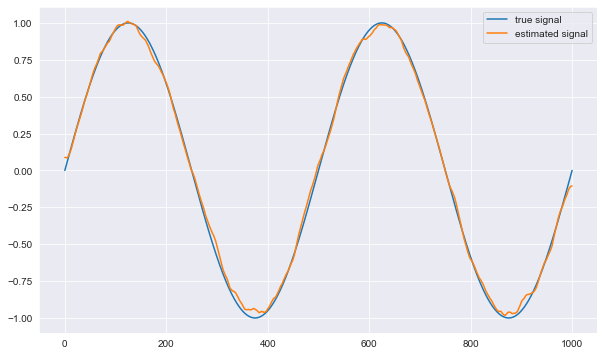

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal1, label='true signal')
plt.plot(t, problem.estimates[1], label='estimated signal')
plt.legend()
plt.show()

In [7]:
problem.holdout_validation(solver=SOLVER, seed=42)

37.292309519797406

## Second-Order Difference Smoothing

In [8]:
problem = Problem(data=y, components=[GaussNoise, SmoothSecondDifference])
problem.optimize_weights(solver=SOLVER)
problem.weights.value

array([1.000000e+00, 4.329722e+06])

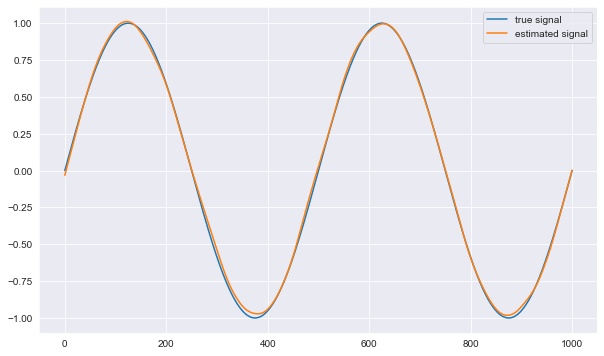

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal1, label='true signal')
plt.plot(t, problem.estimates[1], label='estimated signal')
plt.legend()
plt.show()

In [10]:
problem.holdout_validation(solver=SOLVER, seed=42)

36.97950662988649

# More Complex Signal

In [11]:
np.random.seed(42)
t = np.linspace(0, 1000, 3000)
signal1 = (np.sin(2 * np.pi * t * 5 / (500.))
           + np.cos(2 * np.pi * t * 7 / (550.) + np.sin(2 * np.pi * t * 13 / (550.))))
y = signal1 + 0.25 * np.random.randn(len(signal1))

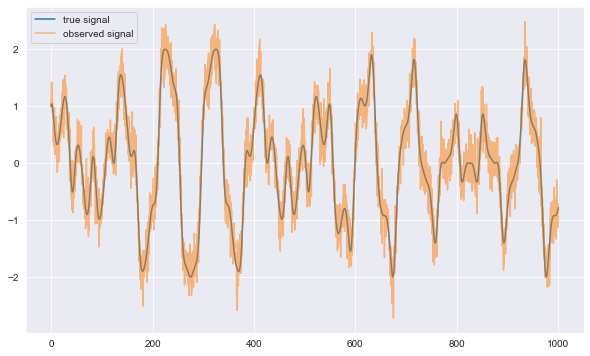

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal1, label='true signal')
plt.plot(t, y, alpha=0.5, label='observed signal')
plt.legend()
plt.show()

## First-Order Difference Smoothing

In [13]:
problem = Problem(data=y, components=[GaussNoise, SmoothFirstDifference])
problem.optimize_weights(solver=SOLVER)
problem.weights.value

array([ 1.        , 12.73289182])

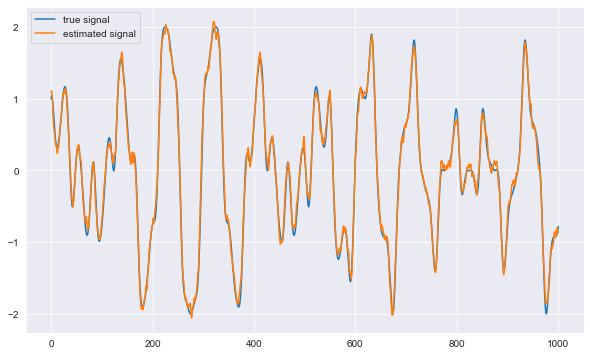

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal1, label='true signal')
plt.plot(t, problem.estimates[1], label='estimated signal')
plt.legend()
plt.show()

In [15]:
problem.holdout_validation(solver=SOLVER, seed=42)

39.97616083642915

## Second-Order Difference Smoothing

In [16]:
problem = Problem(data=y, components=[GaussNoise, SmoothSecondDifference])
problem.optimize_weights(solver=SOLVER)
problem.weights.value

array([1.0000000e+00, 1.0793678e+03])

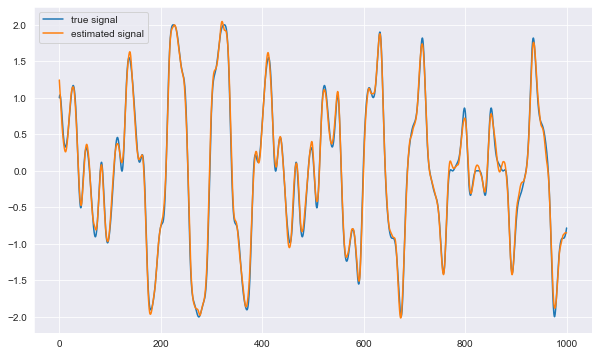

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal1, label='true signal')
plt.plot(t, problem.estimates[1], label='estimated signal')
plt.legend()
plt.show()

In [18]:
problem.holdout_validation(solver=SOLVER, seed=42)

38.435919879810925